In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("../Dataset/dataset.csv")

In [3]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
labels = data['Disease'].value_counts()
labels

Diabetes                                   120
Psoriasis                                  120
Typhoid                                    120
GERD                                       120
Hyperthyroidism                            120
Hepatitis D                                120
hepatitis A                                120
Impetigo                                   120
Jaundice                                   120
Tuberculosis                               120
Drug Reaction                              120
Hypothyroidism                             120
Common Cold                                120
Cervical spondylosis                       120
Dimorphic hemmorhoids(piles)               120
Dengue                                     120
(vertigo) Paroymsal  Positional Vertigo    120
Hypertension                               120
Pneumonia                                  120
Migraine                                   120
Arthritis                                  120
Alcoholic hep

In [5]:
data_sevrity = pd.read_csv('../Dataset/Symptom-severity.csv')
data_sevrity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [141]:
data_dict = data_sevrity.set_index('Symptom').T.to_dict()

In [7]:
def remove_space_between_word(dataset):
    for idx in dataset.index:
        for col in dataset:
            if (type(dataset[col][idx]) == str ):
                dataset[col][idx] = dataset[col][idx].strip()
                dataset[col][idx] = dataset[col][idx].replace(" ", "_")
    return data

In [8]:
data = remove_space_between_word(data)
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal_infection,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal_infection,itching,skin_rash,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def encode_severity(dataset):
    for idx in data_sevrity.index:
        dataset = dataset.replace(data_sevrity["Symptom"][idx] , data_sevrity["weight"][idx])
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic__patches" , 6)
    dataset = dataset.replace("spotting__urination" , 6)
    dataset = dataset.fillna(0)
    return dataset

In [10]:
data = encode_severity(data)

In [11]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,1,3,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fungal_infection,3,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal_infection,1,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fungal_infection,1,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fungal_infection,1,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data.describe()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,3.410976,4.165854,4.173171,3.967073,3.195122,2.654878,2.059756,1.712195,1.554878,1.304878,0.979268,0.702439,0.492683,0.323171,0.282927,0.136585,0.029268
std,1.316310,1.207541,1.249229,1.855343,2.163883,2.384472,2.340259,2.244483,2.250034,2.061402,1.880334,1.799707,1.529126,1.305543,1.298518,0.719747,0.240191
min,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,5.000000,2.000000


In [13]:
data.dtypes

Disease        object
Symptom_1       int64
Symptom_2       int64
Symptom_3       int64
Symptom_4     float64
Symptom_5     float64
Symptom_6     float64
Symptom_7     float64
Symptom_8     float64
Symptom_9     float64
Symptom_10    float64
Symptom_11    float64
Symptom_12    float64
Symptom_13    float64
Symptom_14    float64
Symptom_15    float64
Symptom_16    float64
Symptom_17    float64
dtype: object

In [14]:
labels = data['Disease']
data = data.drop('Disease',axis=1)

In [15]:
labels.head()

0    Fungal_infection
1    Fungal_infection
2    Fungal_infection
3    Fungal_infection
4    Fungal_infection
Name: Disease, dtype: object

In [16]:
data.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1,3,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.2, shuffle=True, random_state= 40)

In [138]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
y_pred = dtc.predict(xtest)
print(accuracy_score(ytest,y_pred))

0.9949186991869918


In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain.values,ytrain.values)
y_pred = rfc.predict(xtest.values)
print(accuracy_score(ytest,y_pred))

0.9898373983739838


In [139]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(xtrain,ytrain)
y_pred = svc.predict(xtest)
print(accuracy_score(ytest,y_pred))

0.9217479674796748


In [142]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(cv = 3, random_state=43)

lrcv.fit(xtrain,ytrain)
y_pred = lrcv.predict(xtest)
print(accuracy_score(ytest,y_pred))

0.9247967479674797


In [154]:
from sklearn.model_selection import GridSearchCV
param_grid = {
#     'bootstrap': [True],
    'max_depth': [70, 80, 90, 100, 110],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 3, 4, 7],
    'n_estimators': [100, 200, 300, 400],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [155]:
grid_search.fit(xtrain, ytrain)
grid_search.best_params_

Fitting 4 folds for each of 320 candidates, totalling 1280 fits


{'max_depth': 70,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [156]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.5f}%.'.format(accuracy))
    
    return accuracy

In [157]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, xtest, ytest)

Model Performance
Accuracy = 0.99492%.


In [158]:
i = 0
for i in range(0,len(xtest)):
    ypred = rfc.predict(np.array(xtest.iloc[i]).reshape(1,-1))
    if ypred != ytest.iloc[i]:
        print(i)
        print(ytest.iloc[i])
        print(ypred)

215
Fungal_infection
['Gastroenteritis']
323
Fungal_infection
['Gastroenteritis']
398
Paralysis_(brain_hemorrhage)
['Allergy']
610
Fungal_infection
['Gastroenteritis']
874
Paralysis_(brain_hemorrhage)
['Allergy']


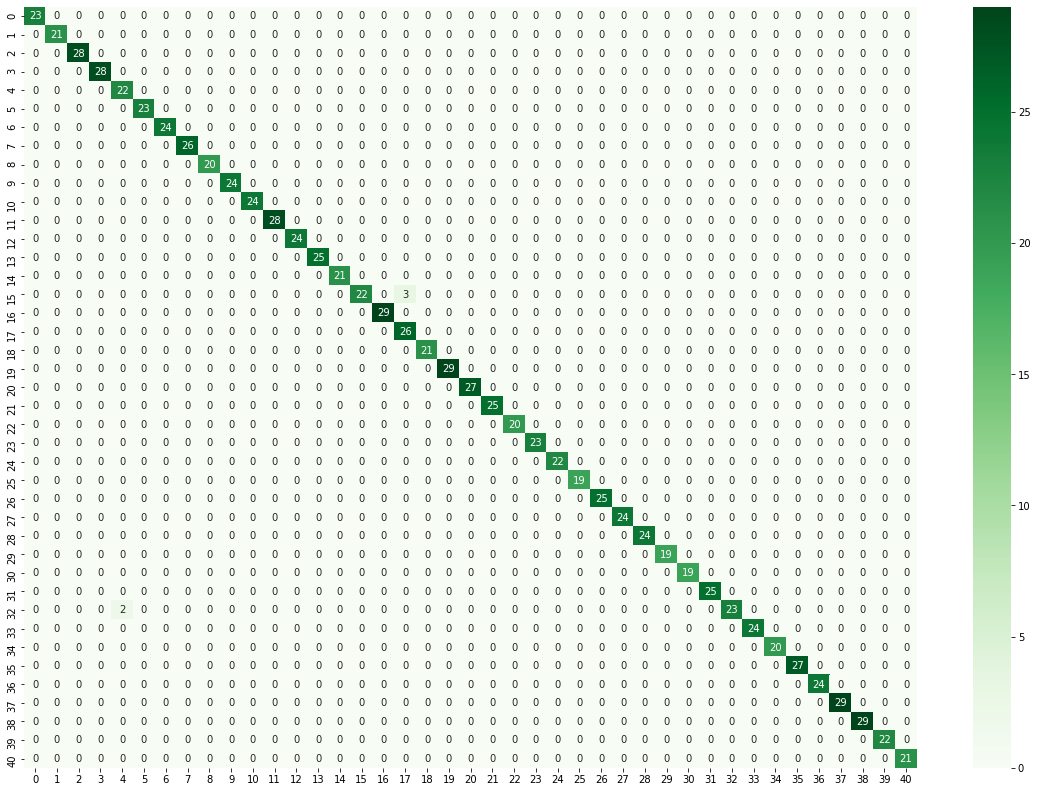

In [159]:
y_pred = rfc.predict(xtest.values)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,y_pred)
plt.figure(figsize=(20,14))
sns.heatmap(cf,annot=True,cmap="Greens")

In [106]:
symp = pd.Series(['muscle_wasting',math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan])
symp = encode_severity(symp)

In [107]:
symp

0     3.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
dtype: float64

In [143]:
y_pred_prob = dtc.predict_proba(np.array(symp).reshape(1,-1))
y_pred_prob

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [144]:
dtc.predict(np.array(symp).reshape(1,-1))

array(['Acne'], dtype=object)

In [115]:
print(np.argmax(y_pred_prob))

2
